# Determining a promising tariff for a telecom company

## Project Description

As an analyst at "Megaline," a national mobile network operator, your task is to perform an initial analysis of the two tariff plans offered to customers: "Smart" and "Ultra." The commercial department requires this analysis to help adjust the advertising budget and determine which tariff generates more revenue.

To conduct the analysis, you'll use a sample of 500 "Megaline" users, analyzing data such as their demographics, location, and usage patterns, including the number of calls and messages sent during 2018. By studying customer behavior, you'll need to arrive at a conclusion regarding which tariff plan is more favorable.

# Table of contents

---

1. [Data overview](#data-overview)
    * [Conclusion](#overview-conclusion)
2. [Data preparation](#data-preparation)
    * [Conclusion](#preparation-conclusion)
3. [Data analysis](#data-analysis)
    * [Histograms](#analysis-histograms)
4. [Hypothesis testing](#hypothesis-testing)
    * [Hypothesis #1](#hypothesis-1)
    * [Hypothesis #2](#hypothesis-2)
5. [General conclusion](#conclusion)


---



## Data overview <a class="anchor" id="data-overview"></a>

**Importing libraries, reading data**

Importing necessary libraries and modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats as st

Opening the data with `try` and `except` with different paths.

In [2]:
try:
    calls = pd.read_csv("/datasets/calls.csv")
    internet = pd.read_csv("/datasets/internet.csv")
    messages = pd.read_csv("/datasets/messages.csv")
    tariffs = pd.read_csv("/datasets/tariffs.csv")
    users = pd.read_csv("/datasets/users.csv")
except FileNotFoundError:
    try:
        calls = pd.read_csv("calls.csv")
        internet = pd.read_csv("internet.csv")
        messages = pd.read_csv("messages.csv")
        tariffs = pd.read_csv("tariffs.csv")
        users = pd.read_csv("users.csv")
    except FileNotFoundError:
        try:
            calls = pd.read_csv(r"calls.csv")
            internet = pd.read_csv(r"internet.csv")
            messages = pd.read_csv(r"messages.csv")
            tariffs = pd.read_csv(r"tariffs.csv")
            users = pd.read_csv(r"users.csv")
        except FileNotFoundError:
            print("File not found")

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.2f}".format

**Data information**
    
**Calls**

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.duplicated().sum()

0

From the introductory data, it is known that there are calls with zero duration - these are missed calls:

In [6]:
calls_zero = calls[calls["duration"] == 0]
len(calls_zero)

39613

Description:
-   `id`: unique call identifier
-   `call_date`: date of the call
-   `duration`: call duration in minutes
-   `user_id`: identifier of the user who made the call

**Internet**

In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
internet.duplicated().sum()

0

In [10]:
internet["Unnamed: 0"].unique()

array([     0,      1,      2, ..., 149393, 149394, 149395])

Description:
-   `id`: unique session identifier
-   `mb_used`: volume of internet traffic used during the session (in megabytes)
-   `session_date`: date of the internet session
-   `user_id`: identifier of the user

**Messages**

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
messages.duplicated().sum()

0

Description:
-   `id`: unique message identifier
-   `message_date`: date of the message
-   `user_id`: identifier of the user who sent the message

**Tariffs**

In [14]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [15]:
tariffs.duplicated().sum()

0

In [16]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Description:
-   `tariff_name`: tariff name
-   `rub_monthly_fee`: monthly subscription fee in rubles
-   `minutes_included`: number of minutes included in the monthly subscription fee
-   `messages_included`: number of messages included in the monthly subscription fee
-   `mb_per_month_included`: volume of internet traffic included in the monthly subscription fee (in megabytes)
-   `rub_per_minute`: cost of a minute of conversation above the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged for minutes beyond the 100th)
-   `rub_per_message`: cost of sending a message above the tariff package
-   `rub_per_gb`: cost of an additional gigabyte of internet traffic above the tariff package (1 gigabyte = 1024 megabytes)

**Users**

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [19]:
users.isna().mean()

user_id      0.00
age          0.00
churn_date   0.92
city         0.00
first_name   0.00
last_name    0.00
reg_date     0.00
tariff       0.00
dtype: float64

In [20]:
users.duplicated().sum()

0

Users who stopped using the tariff:

In [21]:
users["churn_date"].value_counts().sum()

38

In [22]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Description:
-   `user_id`: unique user identifier
-   `first_name`: user's first name
-   `last_name`: user's last name
-   `age`: user's age (years)
-   `reg_date`: date of tariff activation (day, month, year)
-   `churn_date`: date of discontinuation of using the tariff (if the value is missing, the tariff was still active at the time of data extraction)
-   `city`: user's city of residence
-   `tariff`: name of the tariff plan

### Conclusion <a class="anchor" id="overview-conclusion">

What needs to be done:

Data on **calls**, **internet sessions**, and **messages**: convert dates to the correct format and add columns with months.
Data on **calls**: the duration column needs to be rounded up to the nearest integer value.
Data on **users**: convert dates to the correct format.
Other findings:

Known zeros: 39613 missed calls (duration=0.00) in `calls["duration"]`.
Suspicious column `internet["Unnamed: 0"]` - it has no information and no description.
Missing values found: 38 NaN's in `users["churn_date"]`.

## Data preparation <a class="anchor" id="data-preparation"></a>

**Data preprocessing**

I will delete the column `internet["Unnamed: 0"]`, as it contains no useful information.

In [23]:
internet = internet.drop("Unnamed: 0", axis=1)

Renaming the column `tariffs["tariff_name"]` will be useful to "hook onto" it when merging with `users` later.

In [24]:
tariffs.rename(columns={"tariff_name":"tariff"},inplace=True)
display(users.head(1))
tariffs.head(1)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart


The `*_date` columns are in object format. They need to be converted to datetime format. The `for` loop will be used so if new dataframes will appear they just need to be added in the list `date_columns`.

In [25]:
date_columns = [
    "call_date", "session_date",
    "message_date", "churn_date",
    "reg_date"
]
dataframes = [calls, internet, messages, users]

for df_name in dataframes:
    for col in date_columns:
        if col in df_name.columns:
            df_name[col] = pd.to_datetime(df_name[col], format="%Y-%m-%d")

Processing the call duration by rounding up to the nearest whole number.

In [26]:
calls["duration"] = np.ceil(calls["duration"]).astype("int")

Adding columns with months to the tables.

In [27]:
calls["month"] = calls["call_date"].apply(lambda x: x.month)
internet["month"] = internet["session_date"].apply(lambda x: x.month)
messages["month"] = messages["message_date"].apply(lambda x: x.month)

Grouping the data by calls.

In [28]:
calls_grouped = calls.pivot_table(
    index=["user_id", "month"],
    values="duration",
    aggfunc=["sum","count"]
).reset_index()
calls_grouped.columns = ["user_id", "month", "duration_sum", "duration_count"]

Grouping the data by messages.

In [29]:
messages_grouped = messages.pivot_table(
    index=["user_id","month"],
    values="message_date",
    aggfunc="count"
).reset_index()
messages_grouped.columns = ["user_id", "month", "messages_number"]

Grouping the data by internet traffic.

In [30]:
internet_grouped = internet.pivot_table(
    index=["user_id", "month"],
    values="mb_used",
    aggfunc="sum"
).reset_index()

Adding a column with gigabytes rounded up to the nearest whole number.

In [31]:
internet_grouped["gb_used_rounded"] = internet_grouped["mb_used"] / 1024
internet_grouped["gb_used_rounded"] = np.ceil(internet_grouped["gb_used_rounded"])

**Merging data**

Merging `users` and `tariffs` based on the tariff name.

In [32]:
users = users.merge(tariffs, on="tariff", how="left")
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1000,30720,3000,1950,150,1,1
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


Combining data into one dataframe.

In [33]:
df = internet_grouped.merge(
    messages_grouped, on=["user_id", "month"], how="outer"
)
df = df.merge(
    calls_grouped, on=["user_id", "month"], how="outer"
)
df = df.merge(
    users, on="user_id", how="outer"
)
len(df)
df

,user_id,month,mb_used,gb_used_rounded,messages_number,duration_sum,duration_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.00,2253.49,3.00,22.00,159.00,22.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.00,23233.77,23.00,60.00,172.00,43.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.00,14003.64,14.00,75.00,340.00,47.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.00,14055.93,14.00,81.00,408.00,52.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.00,14568.91,15.00,57.00,466.00,58.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1273,10.00,NaN,NaN,35.00,315.00,40.00,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3212,1273,11.00,NaN,NaN,29.00,272.00,45.00,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3213,1273,12.00,NaN,NaN,39.00,260.00,41.00,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1


Adding a column for excess gigabytes.

In [34]:
df["gb_overrun"] = (df["mb_used"] - df["mb_per_month_included"]) / 1024
df["gb_overrun"] = np.ceil(df["gb_overrun"]).apply(lambda x: 0 if x < 0 else x)

It is necessary to put the data and appearance in order.

In [35]:
# Fill NaN values with 0
df = df.fillna(0)

# Convert columns to integer type
cols_to_int = [
    "month", "mb_used", "gb_used_rounded", "gb_overrun",
    "messages_number", "duration_sum", "duration_count"]
df[cols_to_int] = df[cols_to_int].astype(int)

# Reorder columns
cols_order = [
    "user_id", "city", "first_name", "last_name", "age", "reg_date",
    "churn_date", "month", "tariff", "minutes_included", "messages_included",
    "mb_per_month_included", "duration_sum", "duration_count",
    "messages_number", "mb_used", "gb_used_rounded", "gb_overrun",
    "rub_per_minute", "rub_per_message", "rub_per_gb", "rub_monthly_fee"]
df = df[cols_order]

len(df)

3216

In [36]:
df[df["month"] == 0]

,user_id,city,first_name,last_name,age,reg_date,churn_date,month,tariff,minutes_included,messages_included,mb_per_month_included,duration_sum,duration_count,messages_number,mb_used,gb_used_rounded,gb_overrun,rub_per_minute,rub_per_message,rub_per_gb,rub_monthly_fee
3214,1128,Волжский,Ксения,Агаева,51,2018-12-15,2018-12-23 00:00:00,0,ultra,3000,1000,30720,0,0,0,0,0,0,1,1,150,1950
3215,1371,Омск,Ириней,Трофимов,50,2018-12-25,2018-12-30 00:00:00,0,smart,500,50,15360,0,0,0,0,0,0,3,3,200,550


There are two users with zero value in the month column. The usage period for the tariff is 8 and 5 days. It is unclear what to do with them at this stage.

**Monthly revenue**

Adding columns for revenue from calls, messages, and traffic. Removing negative values with a lambda function.

In [37]:
# Column for revenue from calls:
df["calls_prof"] = (
    df["duration_sum"] - df["minutes_included"]
) * df["rub_per_minute"]
df["calls_prof"] = df["calls_prof"].apply(lambda x: 0 if x < 0 else x)

# Column for revenue from messages:
df["messages_prof"] = (
    df["messages_number"] - df["messages_included"]
) * df["rub_per_message"]
df["messages_prof"] = df["messages_prof"].apply(lambda x: 0 if x < 0 else x)

# Column for revenue from traffic:
df["internet_prof"] = df["gb_overrun"] * df["rub_per_gb"]
df["internet_prof"] = df["internet_prof"].apply(lambda x: 0 if x < 0 else x)

# Total revenue:
df["month_prof"] = (
    df["calls_prof"] + df["messages_prof"] +
    df["internet_prof"] + df["rub_monthly_fee"]
)
len(df)

3216

In [38]:
# Aggregation of internet sessions:
internet_grouped = internet.groupby(
    ["user_id", "month"]
)["mb_used"].sum().reset_index()

# A column with rounded GB
internet_grouped["gb_used"] = np.ceil(internet_grouped["mb_used"] / 1024)
internet_grouped.head(3)

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3.00
1,1000,6,23233.77,23.00
2,1000,7,14003.64,14.00


### Conclusion <a class="anchor" id="preparation-conclusion"></a>

During the data preparation, the following steps were taken:

- The format in all date columns was converted to the standard datetime format.
- Numeric values were converted to integers where necessary.
- Missing values were removed and replaced.
- A final table was assembled that shows the revenue:
    1. From calls;
    2. From messages;
    3. From internet traffic;
    4. Total revenue, which sums up all three revenues and the subscription fee.

## Data analysis <a class="anchor" id="data-analysis"></a>

**Minutes, megabytes, and messages per month**

Pivot table by month with average values for:
- Minutes of calls
- Megabytes of mobile data usage
- Number of sent messages

In [39]:
df_pivot = df.pivot_table(
    index="month", columns="tariff",
    values=[
        "duration_sum", "messages_number",
        "gb_used_rounded", "month_prof"
    ],
    aggfunc="mean"
)

df_pivot

duration_sum        gb_used_rounded       messages_number        \
tariff        smart  ultra           smart ultra           smart ultra   
month                                                                    
0              0.00   0.00            0.00  0.00            0.00  0.00   
1            203.85 428.11            8.74 13.22           18.24 33.78   
2            298.69 297.12           11.84 12.00           24.09 21.96   
3            390.05 489.65           15.23 17.65           31.86 32.30   
4            367.13 458.02           13.62 16.96           30.74 31.56   
5            387.36 510.33           15.91 19.37           33.77 37.85   
6            395.64 479.70           15.95 18.94           33.40 41.73   
7            408.35 545.79           15.88 20.51           33.75 49.85   
8            421.47 510.78           16.74 19.60           33.64 48.44   
9            428.61 539.44           16.39 19.24           33.64 52.29   
10           426.14 558.08           16.88 20.07           33.77 58.43   
11           435.27 541.38           17.00 19.81           34.08 55.79   
12           478.56 592.81           18.20 21.74           35.99 60.61   

       month_prof          
tariff      smart   ultra  
month                      
0          550.00 1950.00  
1          721.32 1950.00  
2          827.60 1975.00  
3         1164.62 2014.86  
4          963.09 2001.82  
5         1197.51 2059.70  
6         1204.02 2039.29  
7         1223.95 2118.13  
8         1320.60 2083.18  
9         1249.95 2024.35  
10        1364.85 2065.85  
11        1343.05 2092.16  
12        1578.53 2138.85

**Mean, variance, and standard deviation**

**"Ultra" tariff**:
- Monthly fee: 1950 rubles
- Includes 3000 minutes of calls, 1000 messages, and 30 GB of mobile data
- Cost of services beyond the tariff package:
    1. 1 minute of call: 1 ruble
    2. 1 message: 1 ruble
    3. 1 GB of mobile data: 150 rubles

In [40]:
df_ultra = df.query('tariff in "ultra"')[
    ["duration_sum", "messages_number", "gb_used_rounded"]
]
pd.options.display.float_format = "{:.2f}".format
variance_ultra = np.var(df_ultra, ddof=1)
display('Average values for the "Ultra" tariff:', df_ultra.mean())
display('Standard deviation for the "Ultra" tariff:', df_ultra.std())
display('Variance for the "Ultra" tariff:', variance_ultra)

'Average values for the "Ultra" tariff:'

duration_sum      526.09
messages_number    49.31
gb_used_rounded    19.47
dtype: float64

'Standard deviation for the "Ultra" tariff:'

duration_sum      317.89
messages_number    47.81
gb_used_rounded     9.87
dtype: float64

'Variance for the "Ultra" tariff:'

duration_sum      101052.49
messages_number     2285.42
gb_used_rounded       97.38
dtype: float64

**"Smart" tariff:**
- Monthly fee: 550 rubles
- Includes 500 minutes of calls, 50 messages, and 15 GB of mobile data
- Cost of services beyond the tariff package:

    1. 1 minute of call: 3 rubles
    2. 1 message: 3 rubles
    3. 1 GB of mobile data: 200 rubles

In [41]:
df_smart = df.query('tariff in "smart"')[
    ["duration_sum", "messages_number", "gb_used_rounded"]
]
pd.options.display.float_format = "{:.2f}".format
variance_smart = np.var(df_smart, ddof=1)
display('Average values for the "Smart" tariff:', df_smart.mean())
display('Standard deviation for the "Smart" tariff:', df_smart.std())
display('Variance for the "Smart" tariff:', variance_smart)

'Average values for the "Smart" tariff:'

duration_sum      417.75
messages_number    33.37
gb_used_rounded    16.32
dtype: float64

'Standard deviation for the "Smart" tariff:'

duration_sum      190.48
messages_number    28.23
gb_used_rounded     5.76
dtype: float64

'Variance for the "Smart" tariff:'

duration_sum      36281.39
messages_number     796.96
gb_used_rounded      33.13
dtype: float64

### Histograms <a class="anchor" id="analysis-histograms"></a>

In [42]:
def plot_hist(df, col, title):
    """
    Function takes dataframe, column name and title and
    then creates the histograms
    """
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(title)
    plt.show()

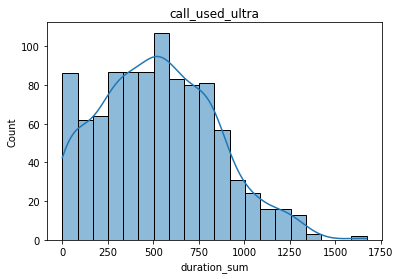

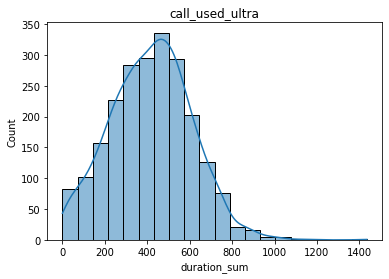

In [43]:
plot_hist(df_ultra, "duration_sum", "call_used_ultra")
plot_hist(df_smart, "duration_sum", "call_used_ultra")

**Conclusion for calls:** the number of calls on the "Ultra" tariff is more evenly distributed and in total exceeds the number of calls made by users on the "Smart" tariff.

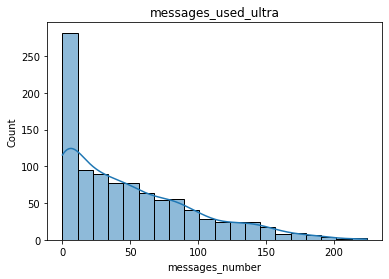

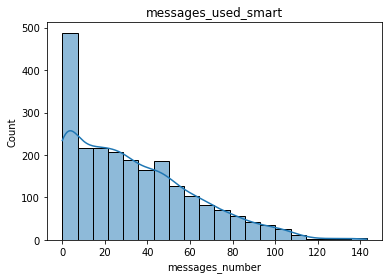

In [44]:
plot_hist(df_ultra, "messages_number", "messages_used_ultra")
plot_hist(df_smart, "messages_number", "messages_used_smart")

**Conclusion for messages:** from the histograms, it can be seen that the majority of users on both tariffs do not send messages. Among those who send messages, users on the "Smart" tariff exceed the included limit, while there is no exceeding of included messages on the "Ultra" tariff.

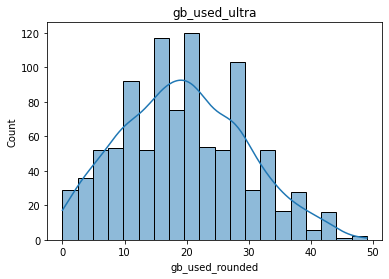

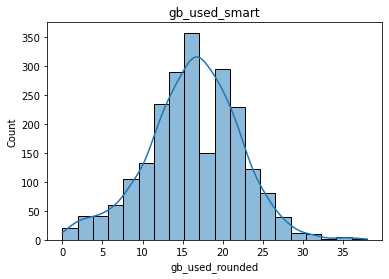

In [45]:
plot_hist(df_ultra, "gb_used_rounded", "gb_used_ultra")
plot_hist(df_smart, "gb_used_rounded", "gb_used_smart")

**Conclusion for mobile data usage:** users on the "Ultra" tariff mostly do not exceed the limit of 30 GB. In the "Smart" tariff, users exceed the limit more often and use an average of 16 GB of mobile data, despite the limit being 15 GB.

## Hypothesis testing <a class="anchor" id="hypothesis-testing"></a>

1. The average revenue of users on the "Ultra" and "Smart" tariffs is different.
2. The average revenue of users from Moscow differs from the revenue of users from other regions.

### Hypothesis #1 <a class="anchor" id="hypothesis-1"></a>

- Null hypothesis H<sub>0</sub>: The average revenue for all users is the same.
- Alternative hypothesis H<sub>1</sub>: The average revenue is different.

Critical level of statistical significance 5%.

In [46]:
smart_test = df.query('tariff == "smart"')["month_prof"]
ultra_test =  df.query('tariff == "ultra"')["month_prof"]
alpha = 0.05

results = st.ttest_ind(
    smart_test, 
    ultra_test)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
    
print("p-value:", results.pvalue)

Reject the null hypothesis
p-value: 8.081909555489933e-161


**Conclusion:**
Based on the results of the t-test, I conclude that the null hypothesis H<sub>0</sub> is **rejected**. Therefore, the hypothesis proposed in the task H<sub>1</sub>: "the average revenue of users on the 'Ultra' and 'Smart' tariffs is different" is confirmed.

### Hypothesis #2 <a class="anchor" id="hypothesis-2"></a>

- Null hypothesis H<sub>0</sub>: The average revenue of users from Moscow is equal to the revenue of users from other regions.
- Alternative hypothesis H<sub>1</sub>: The average revenue of users from Moscow differs from the revenue of users from other regions.

Critical level of statistical significance 5%.

In [47]:
moscow = df.query('city == "Москва"')["month_prof"]
regions =  df.query('city != "Москва"')["month_prof"]
alpha = 0.05

results = st.ttest_ind(
    regions, 
    moscow)
    
if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
        
print("p-value:", results.pvalue)

Fail to reject the null hypothesis
p-value: 0.5400751614511182


**Conclusion:**
Based on the results of the t-test, I conclude that the null hypothesis H<sub>0</sub> is **not rejected**. Therefore, the hypothesis proposed in the task H<sub>1</sub>: "the average revenue of users from Moscow differs from the revenue of users from other regions" is not confirmed.

## General conclusion <a class="anchor" id="conclusion"></a>
During the study of a sample of 500 users of the "Megaline" company and two tariffs, "Ultra" and "Smart," the following was established:

1. "Ultra" tariff users make more and more frequent calls than "Smart" tariff users. However, "Smart" users overpay more than "Ultra" users over the tariff limit.
2. Messages are not very popular on both tariffs, on average no more than 50 are sent per month, which is covered by both tariffs.
3. Internet traffic turned out to be the most indicative when choosing the most profitable tariff for the "Megaline" company. "Ultra" users mostly do not exceed the 30 GB limit. In the "Smart" tariff, users exceed the limit more often and use an average of 16 GB of traffic, with a limit of 15.
4. Hypothesis testing showed the following results (95% probability):
    - "the average revenue of users on the 'Ultra' and 'Smart' tariffs is different" - **confirmed**;
    - "the average revenue of users from Moscow differs from the revenue of users from other regions." - **not confirmed**. Therefore, the null hypothesis "the average revenue of users from Moscow is equal to the revenue of users from other regions" holds true.
5. The "Ultra" tariff is definitely the most profitable for the "Megaline" company.